# 밑준비

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os


os.chdir('/content/drive/MyDrive/Colab Notebooks/DACON/hand_gesture')

In [ ]:
df = pd.read_csv('./data/train.csv')

In [ ]:
df.columns

Index(['id', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'target'],
      dtype='object')

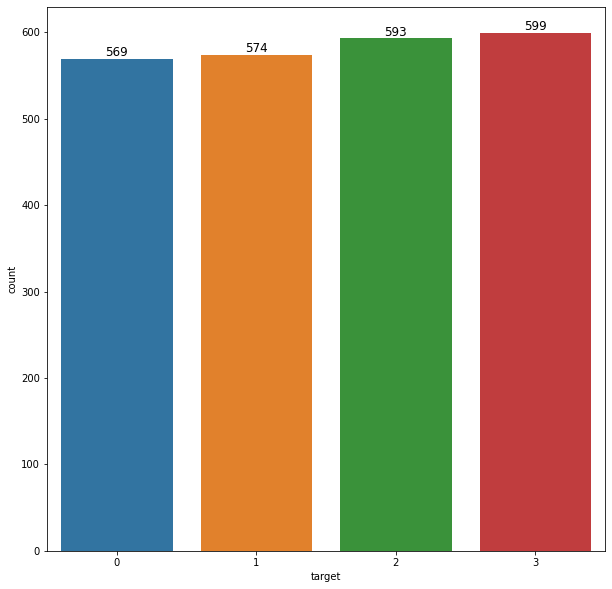

In [ ]:
# 목표 변수 분포 확인
plt.figure(figsize=(10,10))
ax = sns.countplot(x='target', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, p.get_height(), ha = 'center', size = 12)

plt.show()

In [ ]:
df.describe()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,1168.000000,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,674.200761,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,1.000000,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,584.500000,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,1168.000000,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,1751.500000,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,2335.000000,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


In [ ]:
list_1 = df.iloc[2]

In [ ]:
list_1 = list_1[1:-1]

In [ ]:
list_1 = list_1.values

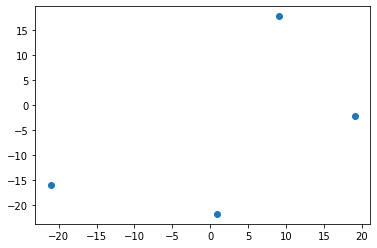

In [ ]:
x = list_1[:8:2]
y = list_1[1:8:2]

plt.scatter(x, y)
plt.show()

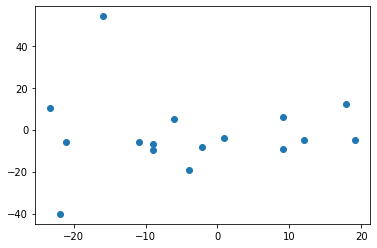

In [ ]:
x = list_1[:16]
y = list_1[-1:15:-1]

plt.scatter(x, y)
plt.show()

### 원본 데이터 저장

In [ ]:
X = df.drop(['id', 'target'], axis=1)
y = df['target']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, stratify=y)

### train set

In [ ]:
X_train

array([[-0.14447511,  0.0228977 , -1.29812018, ..., -0.05031332,
         0.7728222 , -0.32039467],
       [-0.07707448, -0.14484658,  0.40121739, ...,  0.10096518,
        -0.29978037, -0.86889986],
       [ 1.91695434,  0.27229712, -1.79112786, ..., -0.31519247,
        -1.09100216, -0.62821698],
       ...,
       [ 1.84192811, -0.53935741, -1.25607336, ..., -0.03268816,
         0.17955242, -0.26466303],
       [ 0.63730032,  1.24164588, -0.91869194, ...,  0.53003762,
         0.29254012,  1.52921163],
       [ 2.36707215, -1.0639489 , -2.49929709, ...,  0.92250027,
        -0.45072586, -0.0729562 ]])

### test set

In [ ]:
X_test

array([[-0.61079169,  0.28368044, -1.29180753, ...,  0.37115541,
        -2.19004342, -0.07316727],
       [-0.59875138,  0.40638106, -0.08388368, ...,  0.50031979,
        -1.95577991,  0.84557394],
       [-0.42508098, -0.13971944, -0.0534463 , ...,  0.10607475,
         1.24496374, -0.19722327],
       ...,
       [-0.51534496, -0.41091078, -0.65199451, ...,  0.39478393,
         0.69127966,  0.17667856],
       [ 0.08554684, -0.260296  ,  0.13678039, ..., -0.6899319 ,
         0.5749904 ,  0.71025111],
       [ 0.35654994, -0.54157384, -0.69103506, ...,  0.35649615,
         1.00563747, -0.69112177]])

# LGBM

## train / validation set 준비

In [ ]:
# 예상외로 kfold가 더 좋은 결과가 나왔다.
from sklearn.model_selection import StratifiedKFold, KFold


stratifiedkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

## 평가함수 정의

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, average_precision_score


# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred, average='macro')
    print('\n정확도: {:.4f}'.format(accuracy))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

## 튜닝

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

## LGBM

In [ ]:
from lightgbm import LGBMClassifier


def lgbm_bo_no_stratified(max_depth, subsample, colsample_bytree, min_child_samples):
    scores = []

    for train_idx, valid_idx  in kfold.split(X_train, y_train):
        train_data = df.iloc[train_idx]
        valid_data = df.iloc[valid_idx]

        cur_train_X = train_data.drop(['id', 'target'], axis=1)
        cur_train_y = train_data['target']

        cur_valid_X = valid_data.drop(['id', 'target'], axis=1)
        cur_valid_y = valid_data['target']

        lgbm = LGBMClassifier(
            learning_rate=0.01,
            n_estimators=30000,
            max_depth=int(max_depth),
            num_leaves=int(2**(int(max_depth))*0.8),
            min_child_samples=int(min_child_samples),            
            subsample=round(subsample, 2),
            colsample_bytree=round(colsample_bytree, 2),
            random_state=29
            )
        
        lgbm.fit(cur_train_X, cur_train_y, early_stopping_rounds = 50, eval_metric='logloss', eval_set=[(cur_valid_X, cur_valid_y)], verbose=False)

        cur_score = accuracy_score(cur_valid_y, lgbm.predict(cur_valid_X))
        scores.append(cur_score)

    return np.mean(scores)

In [ ]:
lgbm_params={
    'max_depth' : (3, 12),
    'subsample' : (0.7, 1),
    'colsample_bytree' : (0.7 ,1),
    'min_child_samples' : (20, 40)
}

In [ ]:
BO_lgbm = BayesianOptimization(f=lgbm_bo_no_stratified, pbounds = lgbm_params, random_state=29, verbose=2)

BO_lgbm.maximize(init_points=2, n_iter=30, acq='ei')

|   iter    |  target   | colsam... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------
|  1        |  0.8078   |  0.9591   |  5.564    |  21.47    |  0.929    |
|  2        |  0.818    |  0.8358   |  7.881    |  34.53    |  0.9547   |
|  3        |  0.8164   |  0.8866   |  10.46    |  24.8     |  0.7674   |
|  4        |  0.8164   |  0.8634   |  11.34    |  38.74    |  0.7478   |
|  5        |  0.8201   |  0.8517   |  8.386    |  35.33    |  0.9122   |
|  6        |  0.8137   |  0.8985   |  8.643    |  36.6     |  0.9159   |
|  7        |  0.818    |  0.7887   |  8.735    |  34.99    |  0.9737   |
|  8        |  0.8169   |  0.9686   |  7.951    |  35.29    |  0.7523   |
|  9        |  0.8121   |  0.9329   |  6.376    |  20.69    |  0.7165   |
|  10       |  0.8169   |  0.7      |  8.488    |  35.49    |  1.0      |
|  11       |  0.8223   |  0.8437   |  9.914    |  32.64    |  0.8783   |
|  12       |  0.8217   |  0.7964   | 

In [ ]:
BO_lgbm.max

{'params': {'colsample_bytree': 0.843739364546204,
  'max_depth': 9.91379489639296,
  'min_child_samples': 32.63750094713725,
  'subsample': 0.8782901857460829},
 'target': 0.822267781107081}

In [ ]:
lgbm_params = BO_lgbm.max['params']
lgbm_params['learning_rate'] = 0.01
lgbm_params['max_depth'] = int(lgbm_params['max_depth'])
lgbm_params['num_leaves'] = int(2**lgbm_params['max_depth'] *0.8)
lgbm_params['min_child_samples'] = int(lgbm_params['min_child_samples'])
lgbm_params['subsample'] = round(lgbm_params['subsample'], 2)
lgbm_params['colsample_bytree'] = round(lgbm_params['colsample_bytree'], 2)
lgbm_params['random_state'] = 29
lgbm_params

{'colsample_bytree': 0.84,
 'learning_rate': 0.01,
 'max_depth': 9,
 'min_child_samples': 32,
 'num_leaves': 409,
 'random_state': 29,
 'subsample': 0.88}

[1]	valid_0's multi_logloss: 1.37989	valid_0's multi_logloss: 1.37989
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.37391	valid_0's multi_logloss: 1.37391
[3]	valid_0's multi_logloss: 1.36859	valid_0's multi_logloss: 1.36859
[4]	valid_0's multi_logloss: 1.36263	valid_0's multi_logloss: 1.36263
[5]	valid_0's multi_logloss: 1.35719	valid_0's multi_logloss: 1.35719
[6]	valid_0's multi_logloss: 1.3518	valid_0's multi_logloss: 1.3518
[7]	valid_0's multi_logloss: 1.34638	valid_0's multi_logloss: 1.34638
[8]	valid_0's multi_logloss: 1.34118	valid_0's multi_logloss: 1.34118
[9]	valid_0's multi_logloss: 1.33605	valid_0's multi_logloss: 1.33605
[10]	valid_0's multi_logloss: 1.33079	valid_0's multi_logloss: 1.33079
[11]	valid_0's multi_logloss: 1.32571	valid_0's multi_logloss: 1.32571
[12]	valid_0's multi_logloss: 1.32021	valid_0's multi_logloss: 1.32021
[13]	valid_0's multi_logloss: 1.31519	valid_0's multi_logloss: 1.31519
[14]	valid_0's multi_logl

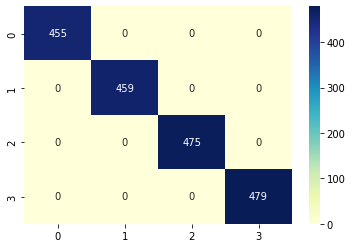

In [ ]:
lgbm_tuned = LGBMClassifier(**lgbm_params, n_estimators=100000)

lgbm_tuned.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=True)
y_pred_lgbm = lgbm_tuned.predict(X_test)

get_clf_eval(y_train, lgbm_tuned.predict(X_train))


정확도: 0.8137
F1: 0.8127


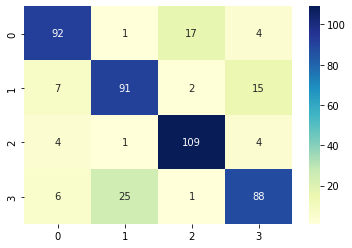

In [ ]:
get_clf_eval(y_test, y_pred_lgbm)

In [ ]:
lgbm_tuned = LGBMClassifier(**lgbm_params, n_estimators=1353)

lgbm_tuned.fit(X, y)

LGBMClassifier(colsample_bytree=0.84, learning_rate=0.01, max_depth=9,
               min_child_samples=32, n_estimators=1353, num_leaves=409,
               random_state=29, subsample=0.88)


정확도: 1.0000
F1: 1.0000


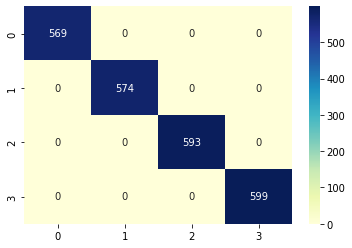

In [ ]:
get_clf_eval(y, lgbm_tuned.predict(X))

## LOFO

가장 잘 나온 모델을 기준으로 진행

LGBMClassifier(colsample_bytree=0.72, learning_rate=0.01, max_depth=5,
               min_child_samples=30, n_estimators=1208, num_leaves=25,
               random_state=29, scale_pos_weight=1.2, subsample=0.87)

In [ ]:
features = list(X.columns)

In [ ]:
f1_scores = []

for col in features:
    cur_lgbm = LGBMClassifier(colsample_bytree=0.72, learning_rate=0.01, max_depth=5, min_child_samples=30, n_estimators=1353, num_leaves=25, random_state=29, scale_pos_weight=1.2, subsample=0.87)
    col_list = list(X_train.columns.difference([col]))
    cur_lgbm.fit(X_train[col_list], y_train)
    cur_score = f1_score(y_test, cur_lgbm.predict(X_test[col_list]), average='macro')
    f1_scores.append((cur_score, col))

f1_scores.sort()
f1_scores

[(0.7824956684135318, 'sensor_5'),
 (0.7888434507149522, 'sensor_26'),
 (0.7893509752901882, 'sensor_11'),
 (0.7896130138321896, 'sensor_19'),
 (0.7914542323969438, 'sensor_12'),
 (0.7917274171683448, 'sensor_16'),
 (0.79353508464425, 'sensor_23'),
 (0.7951475333477855, 'sensor_8'),
 (0.7954050107867287, 'sensor_2'),
 (0.7954775052508684, 'sensor_13'),
 (0.7954896444287856, 'sensor_22'),
 (0.7955228811807759, 'sensor_3'),
 (0.7957250184869756, 'sensor_24'),
 (0.7957487593914065, 'sensor_15'),
 (0.7958932861067891, 'sensor_1'),
 (0.796084914565726, 'sensor_21'),
 (0.7975088183421517, 'sensor_29'),
 (0.7975918124062529, 'sensor_28'),
 (0.7977460370185832, 'sensor_17'),
 (0.7986323833017692, 'sensor_14'),
 (0.7996827363025751, 'sensor_27'),
 (0.7996846501714816, 'sensor_31'),
 (0.7996932461727574, 'sensor_20'),
 (0.8018322544032389, 'sensor_10'),
 (0.8019284497206408, 'sensor_4'),
 (0.8020143875798958, 'sensor_9'),
 (0.8020933102008867, 'sensor_7'),
 (0.8021595397264368, 'sensor_6'),
 (0.

In [ ]:
test_case = []

for case in f1_scores:
    if case[0] > 0.8043:
        test_case.append((case[1], case[0]))

test_case

[('sensor_30', 0.8044954880548945), ('sensor_32', 0.8087550938869148)]

## funded amnt를 제거한 model

In [ ]:
remain_col = list(X_train.columns.difference(['funded_amnt']))
remove_funded_amnt = LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9, min_child_samples=38, n_estimators=1208, num_leaves=409, random_state=29, scale_pos_weight=1.5)

remove_funded_amnt.fit(X[remain_col], y)

LGBMClassifier(colsample_bytree=0.96, learning_rate=0.01, max_depth=9,
               min_child_samples=38, n_estimators=1208, num_leaves=409,
               random_state=29, scale_pos_weight=1.5)

# MLP

In [ ]:
import torch
import torch.nn as nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset 

In [ ]:
class Costomdataset(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [ ]:
class MLP(nn.Module):
    def __init__(self, NUM_CLS):
        super(MLP, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(32, 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(1024, NUM_CLS)
        )
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
traindata = Costomdataset(X_train, y_train)
trainloader = DataLoader(traindata, batch_size=32, shuffle=True)

testdata = Costomdataset(X_test, y_test.to_numpy())
testloader = DataLoader(testdata, batch_size=32, shuffle=False)

In [ ]:
model = MLP(4)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

In [ ]:
loss_ = []
n = len(trainloader)


for epoch in range(400):
    running_loss = 0
    for i, (inputs, values) in enumerate(trainloader, 0):
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.long(), values)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    loss_.append(running_loss / n)


RuntimeError: ignored

In [ ]:
outputs

tensor([[ 3.5851e-03, -1.3498e-03,  1.0375e-01, -2.0920e-01],
        [-7.9984e-02, -9.5445e-02, -3.0062e-02, -6.7227e-02],
        [-2.1085e-01, -1.0324e-01,  6.1136e-02,  2.4964e-02],
        [-5.3004e-02, -8.2022e-03, -2.3666e-02, -8.7288e-03],
        [-9.5823e-02, -8.8602e-02,  1.9176e-02, -7.2895e-03],
        [-1.1280e-01, -1.4700e-02,  1.7362e-01,  1.2791e-01],
        [-2.4685e-01,  3.5178e-02,  6.4935e-02, -4.6025e-02],
        [-4.1554e-01, -5.0764e-04,  6.5109e-02, -1.7927e-01],
        [-1.7611e-01,  1.4866e-02,  1.3403e-01, -6.6266e-02],
        [-1.4748e-01, -1.0013e-01, -2.9951e-02, -3.6071e-02],
        [-2.2627e-01,  1.5324e-01,  2.8138e-01, -4.5260e-02],
        [-1.2582e-01, -2.1008e-02,  1.7108e-01,  8.2254e-02],
        [-8.5447e-02, -4.9769e-02,  8.0130e-02, -3.1446e-02],
        [-6.0545e-02, -9.1700e-03, -9.8584e-02, -8.5414e-03],
        [-1.3006e-01,  1.3143e-02,  2.5911e-02,  9.0481e-02],
        [-7.9393e-02, -2.1694e-01, -1.2562e-01,  8.1494e-02],
        

# 최종 제출



이미 가중치를 준 모델이므로 별도의 threshold는 사용하지 않음

In [ ]:
# 제출 양식 다운로드
submit = pd.read_csv('./data/sample_submission.csv')

test_df = pd.read_csv('./data/test.csv')
test_df = test_df.drop('id', axis=1)
# prediction 수행
y_pred = lgbm_tuned.predict(test_df)

submit['target'] = y_pred

# 제출 파일 저장
submit.to_csv('prediction.csv', index=False)